In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1.2

Consider a signal-plus-noise model of the general form $x_t = s_t + w_t$ where $w_t$ is gaussian white noise and $\sigma_w^2 = 1$. Simulate and plot $n=200$ observatio ns from each of the following two models.

![problem](./images/problem_1-2-a.png)

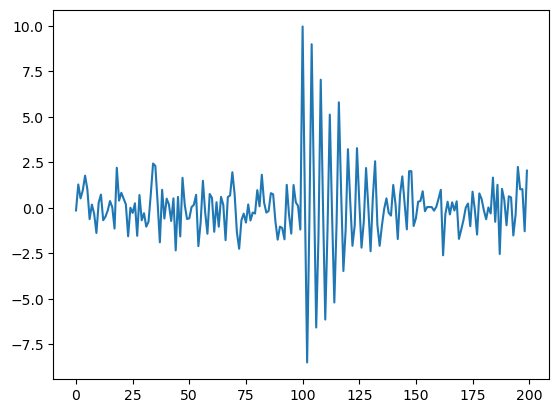

In [2]:
w = np.random.normal(0, 1, 200)
s = np.zeros(200)
generator_func = lambda t: 10 * np.exp(-1 * ((t-100) / 20)) * \
                    np.cos(2*np.pi*t/4)
s[100:] = generator_func(np.arange(100, 200))
x = s + w
plt.plot(x);

![problem](./images/problem_1-2-b.png)

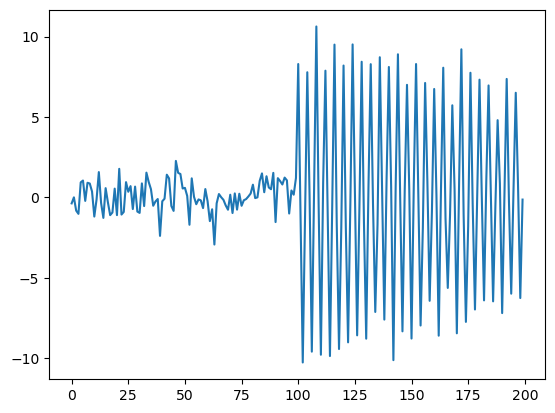

In [3]:
w = np.random.normal(0, 1, 200)
s = np.zeros(200)
generator_func = lambda t: 10 * np.exp(-1 * ((t-100) / 200)) * \
                    np.cos(2*np.pi*t/4)
s[100:] = generator_func(np.arange(100, 200))
x = s+w
plt.plot(x);

c) compare the general appearence of these two series with the earthquake and explosion series in figure 1.7


> series (a) resembles the explosion data, series (b) resembles earthquake data

# 1.3

a) generate n=100 observations from the autoregression 

$$
x_t = -.9 x_{t-2} + w_t
$$

with $\sigma_w = 1$ using method described in example 1.10. Then apply the moving average filter

$$
v_t = (x_t + x_{t-1} + x_{t-2} + x_{t-3}) / 4
$$

Then plot $x_t$ with $v_t$ superimposed

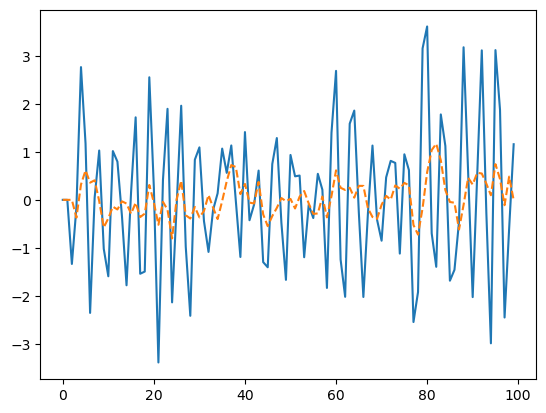

In [4]:
w = np.random.normal(0, 1, 100)
x = np.zeros(100)
for i in range(x.shape[0]):
    if i<2:
        continue
    x[i] = -0.9  * x[i-2] + w[i]
    
v = np.zeros(100)
for i in range(x.shape[0]):
    if i<3:
        continue
    v[i] = np.mean(x[i-3:i+1])
plt.plot(x)
plt.plot(v, '--')

> the moving average filter is reducing the amplitude of the signal and modeling longer-period oscillations than the original signal

b) repeat (a) but with 

$$
x_t = \cos(2\pi t / 4) + w_t
$$

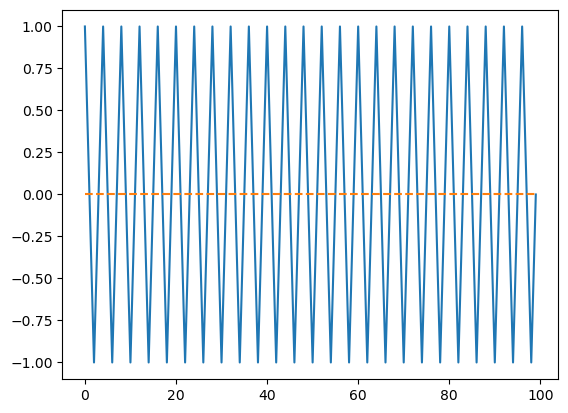

In [5]:
w = np.random.normal(0, 1, 100)
x = np.cos(2 * np.pi * np.arange(*w.shape) / 4)
    
v = np.zeros(100)
for i in range(x.shape[0]):
    if i<3:
        continue
    v[i] = np.mean(x[i-3:i+1])
plt.plot(x)
plt.plot(v, '--')

> The moving average is returning EXACTLY 0 - it's filtering out the entire cos signal

c) repeat (b) with with noise added

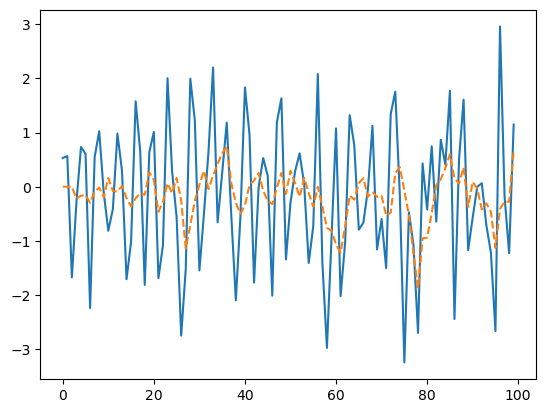

In [6]:
w = np.random.normal(0, 1, 100)
x = np.cos(2 * np.pi * np.arange(*w.shape) / 4) + w
    
v = np.zeros(100)
for i in range(x.shape[0]):
    if i<3:
        continue
    v[i] = np.mean(x[i-3:i+1])
plt.plot(x)
plt.plot(v, '--')

# 1.5

For the 2 series in problem 1.2 a, b:

a) compute and plot the mean functions $\mu_s(t)$ for $t = 1, ..., 200$

b) Calculate the autocovariance functions $\gamma_x(s, t)$, for $s, t = 1,...,200.$

a) calculating $\mu$

![problem](./images/problem_1-2-a.png)

Define functions

In [30]:
s_a = lambda t: 10 * np.exp(-1 * ((t-100) / 20)) * \
                np.cos(2*np.pi*t/4)

s_b = lambda t: 10 * np.exp(-1 * ((t-100) / 200)) * \
                np.cos(2*np.pi*t/4)

def fun_a(t):
    w = np.random.normal(0, 1, 1)
    if t > 100:
        return (s_a(t) + w)[0]
    else:
        return w[0]
    
def fun_b(t):
    w = np.random.normal(0, 1, 1)
    if t > 100:
        return (s_b(t) + w)[0]
    else:
        return w[0]

Run the function 1000 times and take the average to get the expected value

In [49]:
from tqdm.notebook import tqdm

In [50]:
def calculate_mu(fun, n_trials=1000):
    t = np.arange(0, 200)
    mu = np.zeros_like(t)
    for i in range(t.shape[0]):
        mu[i] = np.mean([fun(i) for _ in range(n_trials)])
    return np.array(mu), t

def calculate_autocov(fun, mu, n_trials=1000):
    t = np.arange(0, 200)
    gamma = np.zeros((t.shape[0], t.shape[0]))
    for i in tqdm(range(t.shape[0])):
        for j in range(t.shape[0]):
            E_x_st = np.mean([fun(i) * fun(j) for _ in range(n_trials)])
            mu_mult = mu[i]*mu[j]
            gamma[i, j] = E_x_st - mu_mult
    return gamma

In [52]:
mu_a, t = calculate_mu(fun_a)
gamma_a = calculate_autocov(fun_a, mu_a)

mu_b, t = calculate_mu(fun_b)
gamma_b = calculate_autocov(fun_b, mu_b)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

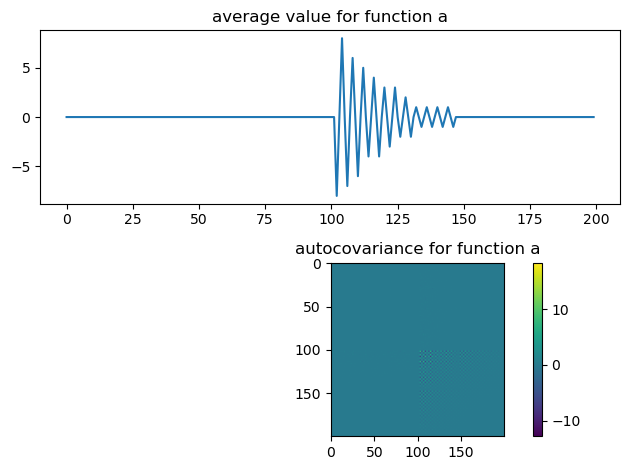

In [64]:
fig, ax = plt.subplots(nrows=2)
ax[0].plot(mu_a)
ax[0].set_title("average value for function a")
im = ax[1].imshow(gamma_a)
ax[1].set_title("autocovariance for function a")
fig.colorbar(im, ax=ax[1])
fig.tight_layout()

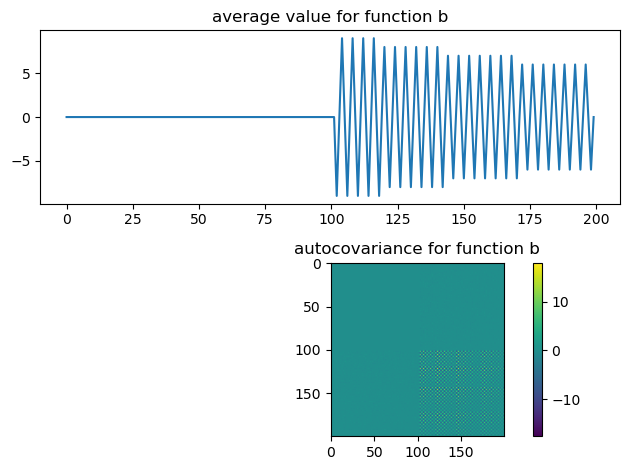

In [65]:
fig, ax = plt.subplots(nrows=2)
ax[0].plot(mu_b)
ax[0].set_title("average value for function b")
im = ax[1].imshow(gamma_b)
ax[1].set_title("autocovariance for function b")
fig.colorbar(im, ax=ax[1])
fig.tight_layout()